# Решение антагонистической матричной игры

In [23]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
%matplotlib inline
def nash_equilibrium(main_mas):
    n=len(main_mas)
    m=len(main_mas[1])
    matr1 = -np.array(main_mas).T
    c = [1]*n
    b = [-1]*m
    result = linprog(c, matr1, b, bounds= [(0, None)] * n)
    v = 1/np.sum(result.x)
    p = v * result.x
    matr2 = np.array(main_mas)
    c = [-1]*m
    b = [1]*n
    result2 = linprog(c, matr2, b, bounds=[(0, None)] * m)
    q = v * result2.x
    return v,p,q
def read():
    n=int(input('число строк: '))
    main_mas = []
    for j in range (n):
        tmp=input().split()
        for i in range (len(tmp)):
            tmp[i]=int(tmp[i])
        main_mas.append(tmp)
    v,p,q=nash_equilibrium(main_mas) 
    print ('решение игры:', v)
    print ('оптимальная стратегия 1 игрока', p)
    print ('оптимальная стратегия 2 игрока', q)
    return p,q

In [24]:
def draw(p,q):
    plt.xlim([0, len(p)+1])
    plt.ylim([0, np.max(p)+1])
    for i in range(len(p)):
        plt.scatter(i+1, p[i])
        plt.scatter(i+1, 0)
        plt.plot([i+1, i+1], [0, p[i]])
    plt.show()

    plt.xlim([0, len(q)+1])
    plt.ylim([0, np.max(q)+1])    
    for i in range(len(q)):
        plt.scatter(i+1, q[i])
        plt.scatter(i+1, 0)
        plt.plot([i+1, i+1], [0, q[i]])
    plt.show()

# 1. Cпектр оптимальной стратегии состоит из одной точки

In [25]:
p,q=read()

число строк: 2
2 1 3
10 7 5
решение игры: 5.0
оптимальная стратегия 1 игрока [ 0.  1.]
оптимальная стратегия 2 игрока [ 0.  0.  1.]


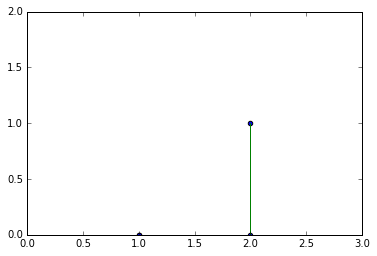

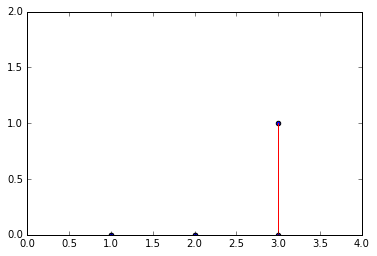

In [27]:
draw(p,q)

# 2. Cпектр оптимальной стратегии неполон

In [29]:
p,q=read()

число строк: 4
4 0 6
3 8 4
1 2 6
6 6 4
решение игры: 4.625
оптимальная стратегия 1 игрока [ 0.3125  0.25    0.      0.4375]
оптимальная стратегия 2 игрока [ 0.125   0.1875  0.6875]


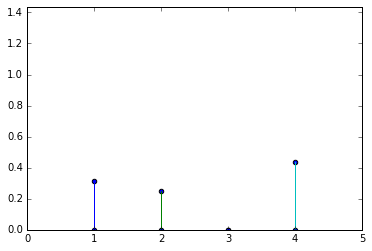

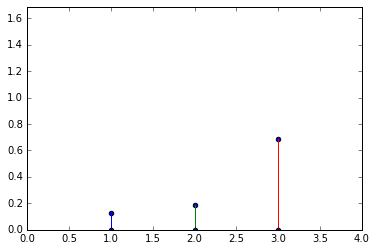

In [30]:
draw(p,q)

# 3. Cпектр оптимальной стратегии полон

In [31]:
p,q=read()

число строк: 3
3 1 5
1 3 3
3 3 1
решение игры: 2.5
оптимальная стратегия 1 игрока [ 0.25  0.25  0.5 ]
оптимальная стратегия 2 игрока [ 0.25  0.5   0.25]


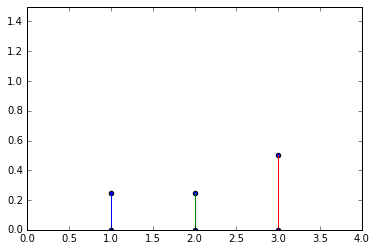

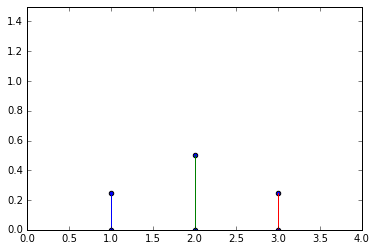

In [32]:
draw(p,q)